# Technical Parameters

## Package loading

In [1]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot


### Project name

In [2]:
name = 'regression_Dielectric_Breakdown'

### Thresholds & other parameters

In [3]:
problem_type = 'regression'

In [4]:
data_size = 'small'

In [5]:
threshold_NaN = 0.5

In [6]:
threshold_cat = 5

In [7]:
threshold_Z = 3.0

In [8]:
test_size = 0.33

In [9]:
threshold_entropy = 0.75

In [10]:
undersampling = False

In [11]:
undersampler = 'Random'

In [12]:
threshold_corr = 1.0

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

In [16]:
with_keras = False

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

In [22]:
random_state = 42

### File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/Dielectric Breakdown Prediction.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'log_breakdown_field'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Exploratory Data Analysis (EDA)

## Drop user's columns & Duplicates

In [28]:
user_drop_cols = []

Dataset before deletion

In [29]:
display(df)

name  experimental_band_gap  phonon_cutoff_frequency  \
0    LiF                   13.6                   19.599   
1   LiCl                    9.4                   12.531   
2   LiBr                    7.6                   11.188   
3    LiI                    6.1                    9.701   
4    NaF                   11.5                   12.275   
..   ...                    ...                      ...   
77   CdO                    0.8                   13.301   
78   CdS                    2.5                    9.090   
79  CdSe                    1.7                    5.953   
80  CdTe                    1.5                    4.786   
81   HgO                    2.2                   12.764   

    mean_phonon_frequency  electronic_contribution_of_dielectric_constant  \
0                  10.435                                           2.068   
1                   6.301                                           3.150   
2                   4.934                                           3.664   
3                   4.113                                           4.465   
4                   7.416                                           1.821   
..                    ...                                             ...   
77                  6.724                                           7.930   
78                  5.203                                           6.565   
79                  3.784                                           8.588   
80                  3.064                                           9.165   
81                  6.035                                           7.548   

    total_dielectric_constant  nearest_neighbor_distance  density  \
0                       7.936                      1.943    2.938   
1                      10.003                      2.477    2.317   
2                      11.287                      2.653    3.862   
3                      12.667                      2.897    4.569   
4                       4.170                      2.227    3.156   
..                        ...                        ...      ...   
77                     19.227                      2.347    8.246   
78                      9.702                      2.519    4.876   
79                     11.662                      2.626    5.696   
80                     11.712                      2.781    6.020   
81                     10.312                      2.250   10.251   

    bulk_modulus structure                   category  log_breakdown_field  
0         86.582        RS       Alkali_metal_halides             8.482519  
1         40.537        RS       Alkali_metal_halides             6.521799  
2         32.869        RS       Alkali_metal_halides             6.171909  
3         25.476        RS       Alkali_metal_halides             5.944111  
4         61.943        RS       Alkali_metal_halides             6.968568  
..           ...       ...                        ...                  ...  
77       155.366        RS  Group_II-VI_semiconductor             5.203457  
78        65.201        ZB  Group_II-VI_semiconductor             4.359270  
79        55.323        ZB  Group_II-VI_semiconductor             2.727853  
80        44.747        ZB  Group_II-VI_semiconductor             3.005683  
81       101.921        ZB  Group_II-VI_semiconductor             5.036303  

[82 rows x 12 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

No duplicate rows.


Drop all the rows for which the target is NaN

In [32]:
df = df.dropna(subset=[target_col])

Dataset after deletion of user’s columns and duplicates

In [33]:
display(df)

name  experimental_band_gap  phonon_cutoff_frequency  \
0    LiF                   13.6                   19.599   
1   LiCl                    9.4                   12.531   
2   LiBr                    7.6                   11.188   
3    LiI                    6.1                    9.701   
4    NaF                   11.5                   12.275   
..   ...                    ...                      ...   
77   CdO                    0.8                   13.301   
78   CdS                    2.5                    9.090   
79  CdSe                    1.7                    5.953   
80  CdTe                    1.5                    4.786   
81   HgO                    2.2                   12.764   

    mean_phonon_frequency  electronic_contribution_of_dielectric_constant  \
0                  10.435                                           2.068   
1                   6.301                                           3.150   
2                   4.934                                           3.664   
3                   4.113                                           4.465   
4                   7.416                                           1.821   
..                    ...                                             ...   
77                  6.724                                           7.930   
78                  5.203                                           6.565   
79                  3.784                                           8.588   
80                  3.064                                           9.165   
81                  6.035                                           7.548   

    total_dielectric_constant  nearest_neighbor_distance  density  \
0                       7.936                      1.943    2.938   
1                      10.003                      2.477    2.317   
2                      11.287                      2.653    3.862   
3                      12.667                      2.897    4.569   
4                       4.170                      2.227    3.156   
..                        ...                        ...      ...   
77                     19.227                      2.347    8.246   
78                      9.702                      2.519    4.876   
79                     11.662                      2.626    5.696   
80                     11.712                      2.781    6.020   
81                     10.312                      2.250   10.251   

    bulk_modulus structure                   category  log_breakdown_field  
0         86.582        RS       Alkali_metal_halides             8.482519  
1         40.537        RS       Alkali_metal_halides             6.521799  
2         32.869        RS       Alkali_metal_halides             6.171909  
3         25.476        RS       Alkali_metal_halides             5.944111  
4         61.943        RS       Alkali_metal_halides             6.968568  
..           ...       ...                        ...                  ...  
77       155.366        RS  Group_II-VI_semiconductor             5.203457  
78        65.201        ZB  Group_II-VI_semiconductor             4.359270  
79        55.323        ZB  Group_II-VI_semiconductor             2.727853  
80        44.747        ZB  Group_II-VI_semiconductor             3.005683  
81       101.921        ZB  Group_II-VI_semiconductor             5.036303  

[82 rows x 12 columns]

### Dataset copy

In [34]:
df_copy = df.copy()

## Dataset Information

### Dataframe structure

In [35]:
plot_dataframe_structure(df)

### Dataframe statistics

In [36]:
display(df.describe().T)

count       mean        std  \
experimental_band_gap                            82.0   4.451220   2.847578   
phonon_cutoff_frequency                          82.0  11.124659   7.272370   
mean_phonon_frequency                            82.0   6.551841   4.855662   
electronic_contribution_of_dielectric_constant   82.0   7.110634   4.702969   
total_dielectric_constant                        82.0  12.356402   8.160925   
nearest_neighbor_distance                        82.0   2.590415   0.455049   
density                                          82.0   4.976646   1.691931   
bulk_modulus                                     82.0  87.320622  76.223575   
log_breakdown_field                              82.0   5.212473   1.096287   

                                                      min        25%  \
experimental_band_gap                            0.200000   2.400000   
phonon_cutoff_frequency                          2.914000   5.983500   
mean_phonon_frequency                            1.415000   3.689500   
electronic_contribution_of_dielectric_constant   1.821000   3.872500   
total_dielectric_constant                        4.170000   7.592750   
nearest_neighbor_distance                        1.523000   2.303750   
density                                          2.317000   3.795750   
bulk_modulus                                    18.317000  41.953500   
log_breakdown_field                              2.360854   4.700252   

                                                      50%        75%  \
experimental_band_gap                            3.750000   6.175000   
phonon_cutoff_frequency                          9.395500  13.262750   
mean_phonon_frequency                            5.325500   7.328000   
electronic_contribution_of_dielectric_constant   5.796000   8.287750   
total_dielectric_constant                       10.603500  13.789000   
nearest_neighbor_distance                        2.552500   2.895250   
density                                          4.901500   5.890500   
bulk_modulus                                    64.352000  93.355000   
log_breakdown_field                              5.219683   5.832905   

                                                       max  
experimental_band_gap                            13.600000  
phonon_cutoff_frequency                          40.513000  
mean_phonon_frequency                            29.674000  
electronic_contribution_of_dielectric_constant   26.290000  
total_dielectric_constant                        57.213000  
nearest_neighbor_distance                         3.604000  
density                                          10.251000  
bulk_modulus                                    460.524000  
log_breakdown_field                               8.482519

## Which columns could be categorical ?

In [37]:
plot_categorical(df)

## Dataset Cleaning

### Drop NaN:

In [38]:
df, drop_cols = drop_na(df, target_col, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [39]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [40]:
display(dropped_cols)

array([], dtype=float64)

### Encoding data:

In [41]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding object column: name
Encoding numeric column: experimental_band_gap
Encoding numeric column: phonon_cutoff_frequency
Encoding numeric column: mean_phonon_frequency
Encoding numeric column: electronic_contribution_of_dielectric_constant
Encoding numeric column: total_dielectric_constant
Encoding numeric column: nearest_neighbor_distance
Encoding numeric column: density
Encoding numeric column: bulk_modulus
Encoding object column: structure
Encoding object column: category
Encoding numeric column: log_breakdown_field


### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


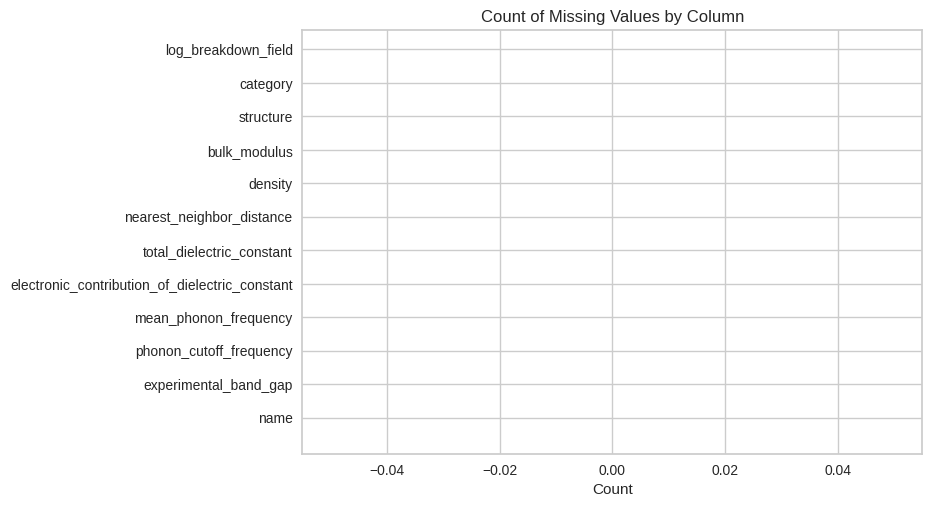

In [42]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

#### Imputation

In [43]:
df = imputation(df)

No need to impute data.


### Data compression:

In [44]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 73.6%


#### Dataframe structure after compression

In [45]:
plot_dataframe_structure(df)

### Outliers:

In [46]:
df = outliers(df, threshold_Z)

Using Z_score,  7  rows will be suppressed.


## Plottings

### Ranking 

#### Ranking 1D 

In [47]:
rank1d(df);

#### Ranking 2D 

##### Ranking 2D according to Pearson

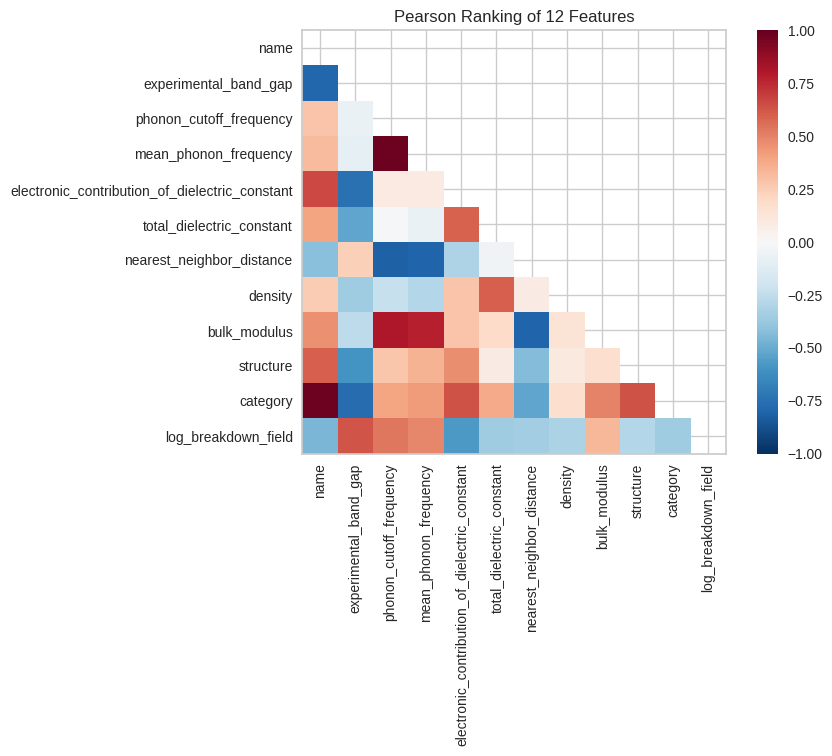

In [48]:
rank2d(df, algorithm='pearson');

##### Ranking 2D based on covariance

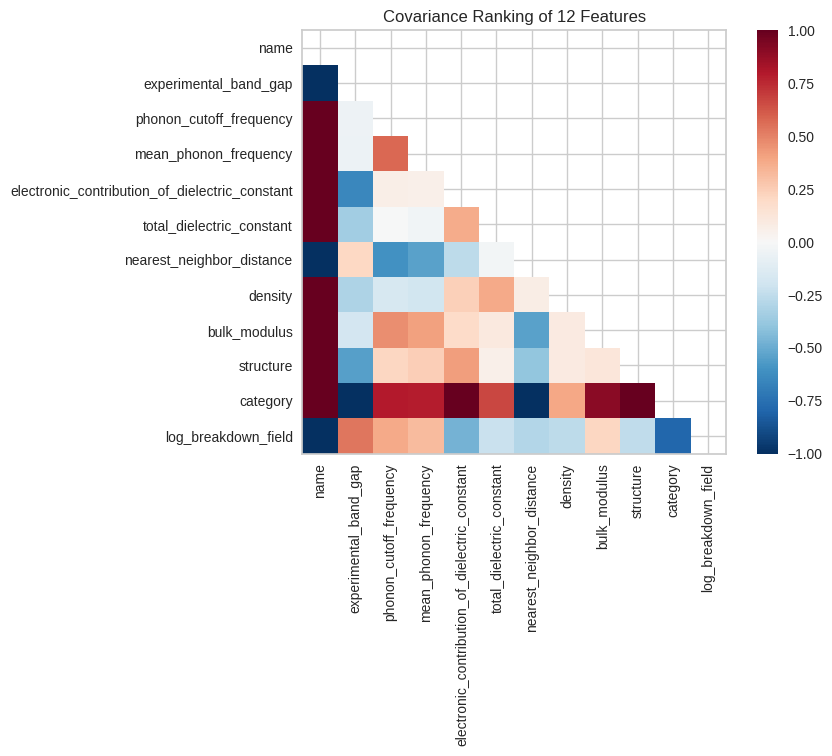

In [49]:
rank2d(df, algorithm='covariance');

##### Ranking 2D according to Spearman

In [50]:
rank2d(df, algorithm='spearman');

##### Ranking 2D according to Kendalltau

In [51]:
rank2d(df, algorithm='kendalltau');

### Correlation according to Pearson

In [52]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [53]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Check columns that should be dropped

In [54]:
print(dropped_cols)

[]


### Correlation according to Spearman (hierarchical clustering)

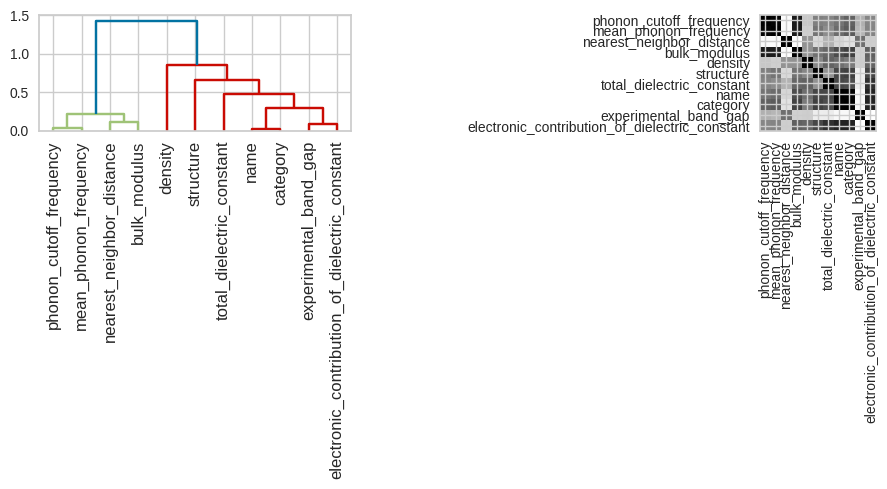

cluster_ids =  [2 2 1 1 2 2 1 2 1 2 2]
selected_features_names =  ['name', 'phonon_cutoff_frequency']


In [55]:
selected_features_names = hierarchical_clustering(df.drop(target_col, axis=1), t=1) 
print('selected_features_names = ', selected_features_names)

### Correlation with Yellow Bricks

##### Splitting dataframe in features and targets

In [56]:
y = df[target_col]

In [57]:
X = df.drop(target_col, axis=1)

In [58]:
feature_correlation(X, y);

In [59]:
feature_correlation(X, y, method='mutual_info-regression');

# Splitting

In [60]:
df = df_copy

## Splitting dataframe in features and targets

In [61]:
y = df[target_col]

In [62]:
X = df.drop(target_col, axis=1)

### Dimensions

In [63]:
nb_features = len(X.columns.tolist())

In [64]:
nb_targets = 1

In [65]:
layer_size = nb_features + nb_targets + 2

### Splitting data in train and test sets 

In [66]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

# Modeling: Model selection

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [67]:
cat_selector, num_selector = get_features()

#### For models based on tree

In [68]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [69]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [70]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [71]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [72]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [73]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [74]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse', random_state = random_state))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error', random_state = random_state))), 
          ('RFRS', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=100, random_state = random_state))), 
          ('RFRA', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=100, random_state = random_state))), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True, random_state = random_state))), 
          ('SGDRS', make_pipeline(ntree_preprocessor, SGDRegressor(loss='squared_error', penalty='elasticnet', random_state = random_state))), 
          ('SGDRH', make_pipeline(ntree_preprocessor, SGDRegressor(loss='huber', penalty='elasticnet', random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ('GBR', make_pipeline(tree_preprocessor, GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=random_state))), 
          ]

#### Level-1 model

In [75]:
level_1 = Ridge(alpha=1, positive=True, random_state = random_state)

#### Stacking for regression

In [76]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

## Model fitting

In [77]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


CPU times: user 443 ms, sys: 148 ms, total: 591 ms
Wall time: 17.6 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 1                             experimental_band_gap
2                           phonon_cutoff_frequency
3                             mean_phonon_frequency
4    electronic_contribution_of_diele...
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('ordinalencoder',
                                                                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                 unknown_value=-1))]),
                                                                                 0          name
9     structure
10     category
Name: column_name, dtype: object)])),
                                               ('gradientboostingregressor',
                                                GradientBoostingRegressor(learning_rate=1.0,
                                                                          random_state=42))]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Model evaluation

### Model scoring

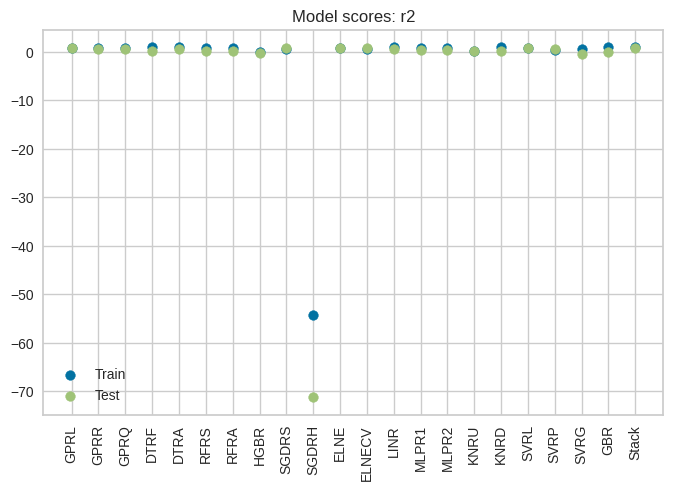

In [78]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### Residuals plot

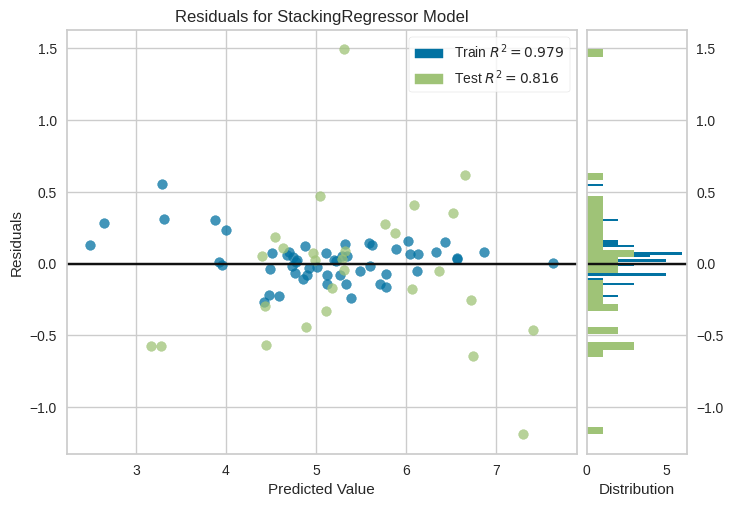

In [79]:
residuals_plot(model, X_train, y_train, X_test, y_test);

### Prediction error

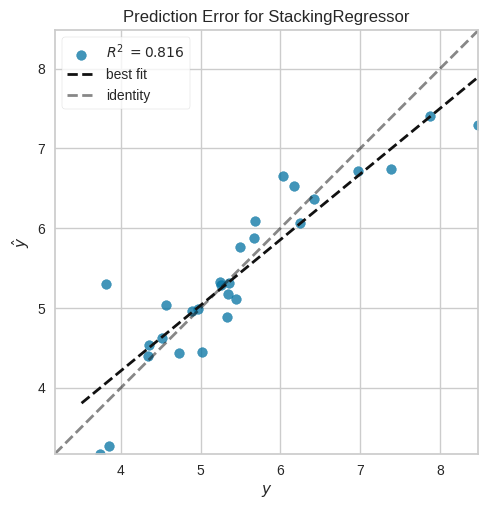

In [80]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Model inspection

### Model importance

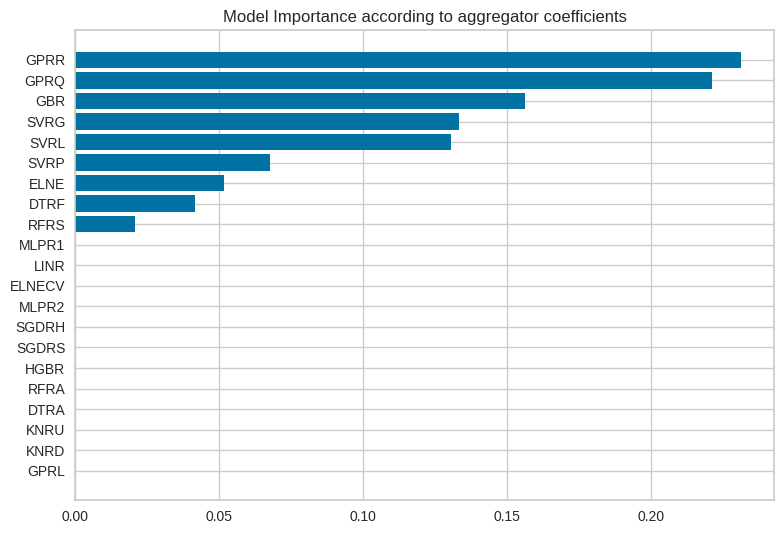

In [81]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

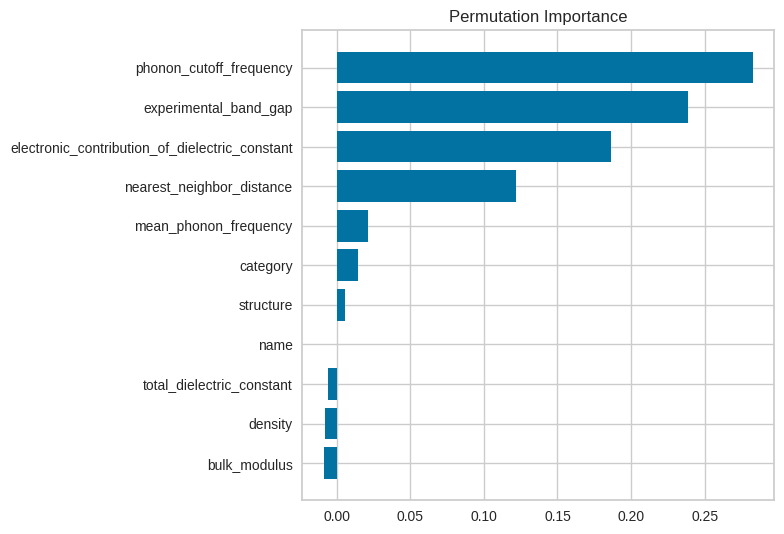

In [82]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Modeling: Feature selection

#### Filtered Level-0 models

In [83]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Build filtered model

In [84]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

## Filtered Model fitting

In [85]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 66.1 ms, sys: 12.4 ms, total: 78.5 ms
Wall time: 1.39 s


StackingRegressor(estimators=[('SGDRS',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 1                             experimental_band_gap
2                           phonon_cutoff_frequency
3                             mean_phonon_frequency
4    electronic_contribution_of_diel...
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 0          name
9     structure
10     category
Name: column_name, dtype: object)])),
                                               ('svr',
                                                SVR(kernel='linear'))]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Filtered Model evaluation

### Filtered Model scoring

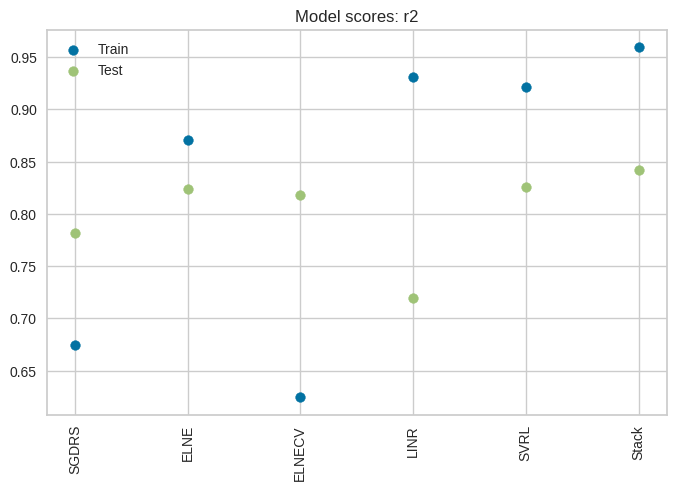

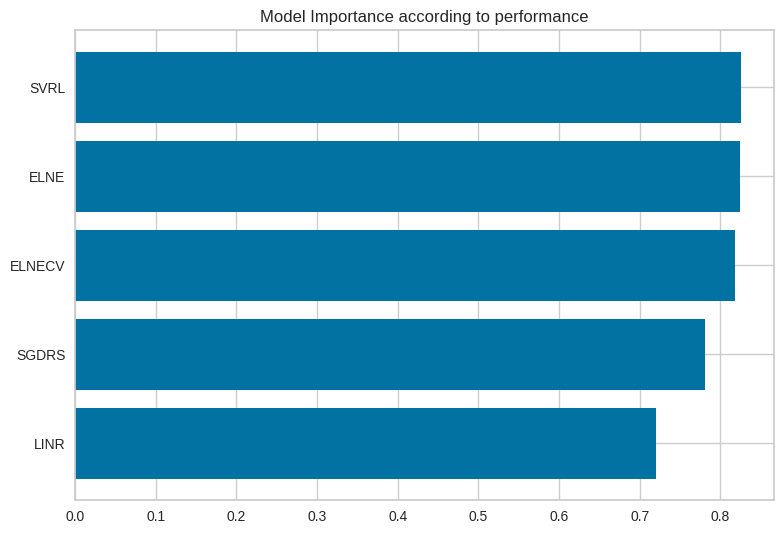

In [86]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered Residuals plot

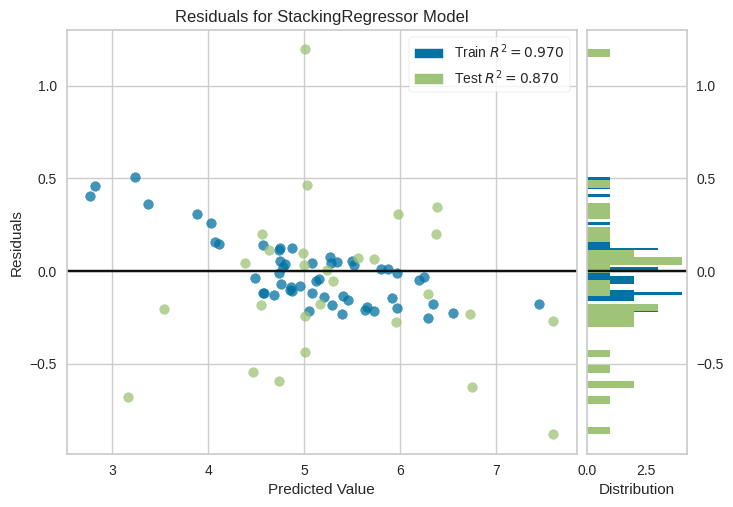

In [87]:
residuals_plot(model, X_train, y_train, X_test, y_test);

### Filtered Prediction error

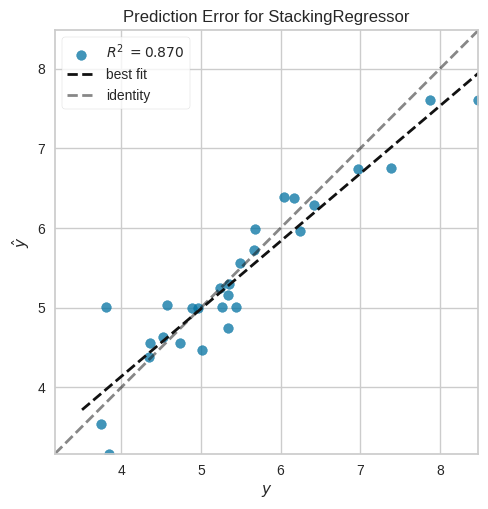

In [88]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Filtered Model inspection

### Filtered Model importance

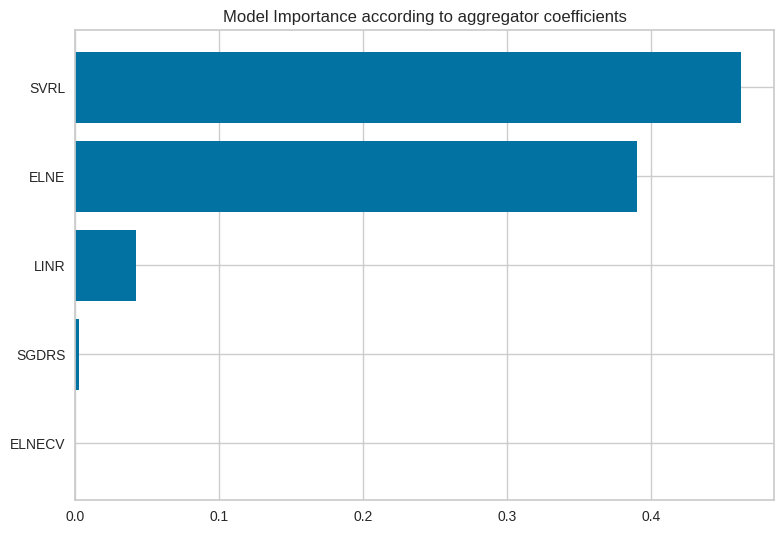

In [89]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

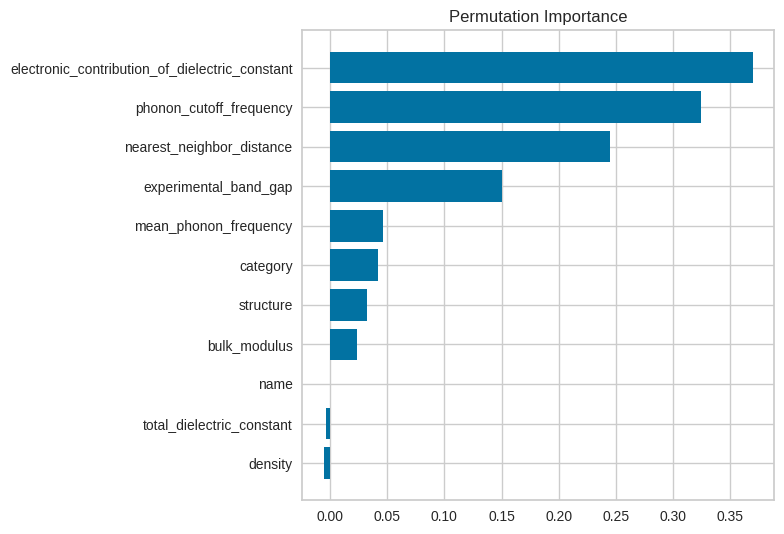

In [90]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [91]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [92]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [93]:
print(dropped_cols)

['bulk_modulus', 'category', 'density', 'name', 'structure', 'total_dielectric_constant']


# Modeling: Final model

In [94]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [95]:
reduce_schema('column_name', dropped_cols)

## Splitting

### Splitting dataframe in features and targets

In [96]:
y = df[target_col] 

In [97]:
X = df.drop(target_col, axis=1) 

### Dimensions

In [98]:
nb_features = len(X.columns.tolist()) 

In [99]:
nb_targets = 1 

In [100]:
layer_size = nb_features + nb_targets + 2 

### Splitting data in train and test sets 

In [101]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

## Final model building

#### Select the categorical and numerical columns

In [102]:
cat_selector, num_selector = get_features() 

#### For models based on tree

In [103]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 

In [104]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True)) 

In [105]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)) 

#### For models not based on tree

In [106]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 

In [107]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler()) 

In [108]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)) 

#### Final level-0 models

In [109]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse', random_state = random_state))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error', random_state = random_state))), 
          ('RFRS', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=100, random_state = random_state))), 
          ('RFRA', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=100, random_state = random_state))), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True, random_state = random_state))), 
          ('SGDRS', make_pipeline(ntree_preprocessor, SGDRegressor(loss='squared_error', penalty='elasticnet', random_state = random_state))), 
          ('SGDRH', make_pipeline(ntree_preprocessor, SGDRegressor(loss='huber', penalty='elasticnet', random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ('GBR', make_pipeline(tree_preprocessor, GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=random_state))), 
          ]

In [110]:
level_0_f = list(set(level_0) & set(model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)))

#### Build the final model

In [111]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

## Final Model fitting

In [112]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 345 ms, sys: 35.8 ms, total: 381 ms
Wall time: 1.41 s


StackingRegressor(estimators=[('ELNE',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 0                             experimental_band_gap
1                           phonon_cutoff_frequency
2                             mean_phonon_frequency
3    electronic_contribution_of_diele...
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 Series([], Name: column_name, dtype: object))])),
                                               ('linearregression',
                                                LinearRegression())]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Final Model evaluation

### Final Model scoring

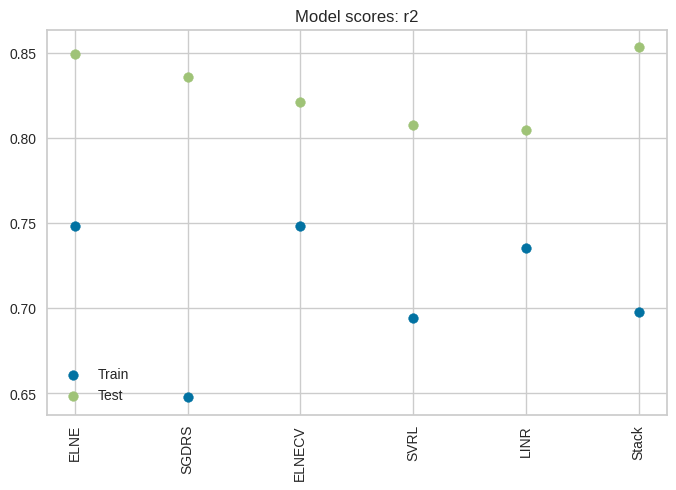

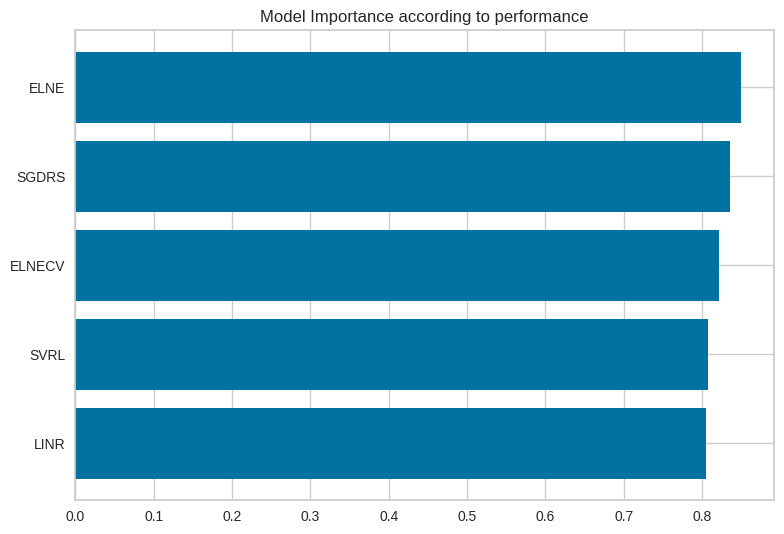

In [113]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

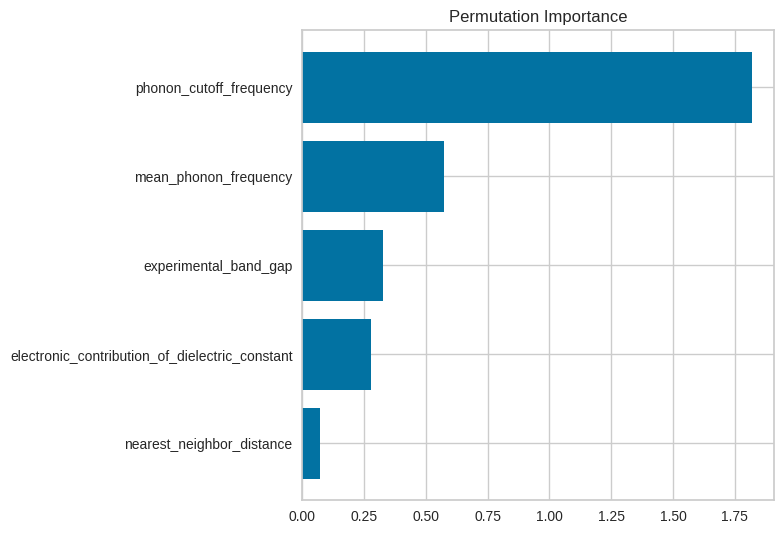

In [114]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

### Final feature elimination

In [115]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final Residuals plot

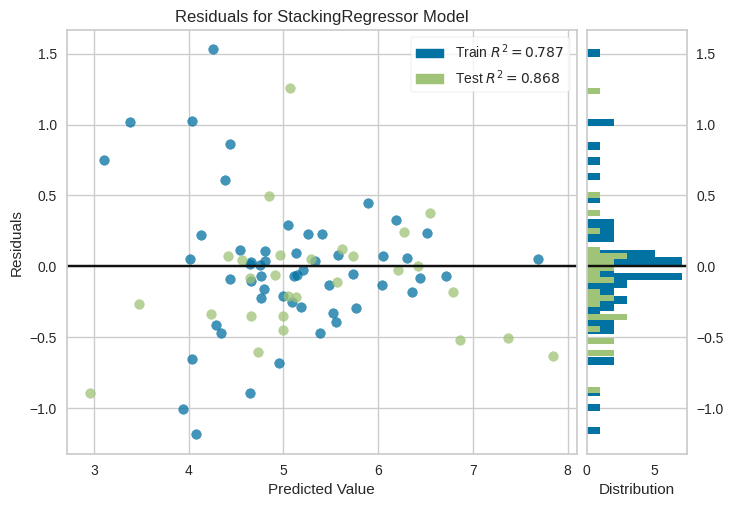

In [116]:
residuals_plot(model, X_train, y_train, X_test, y_test);

### Final Prediction error

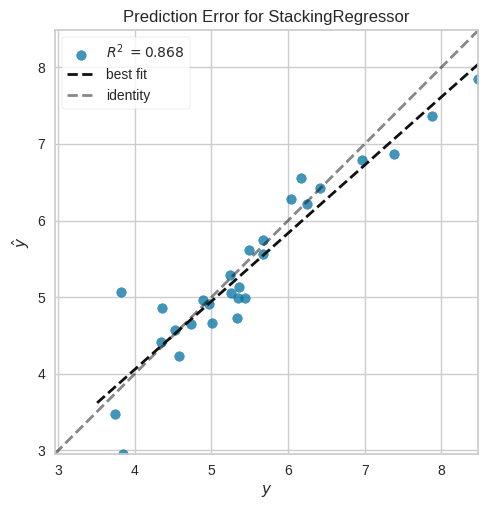

In [117]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Final Model inspection

### Final Model importance

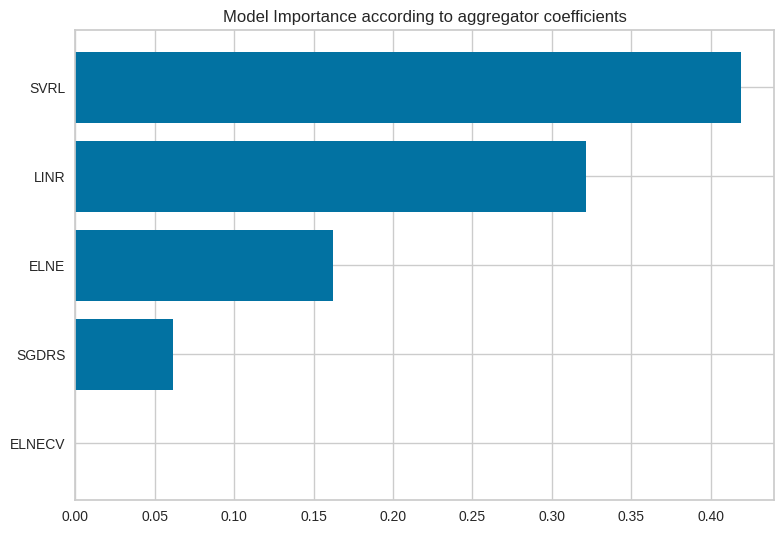

In [118]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

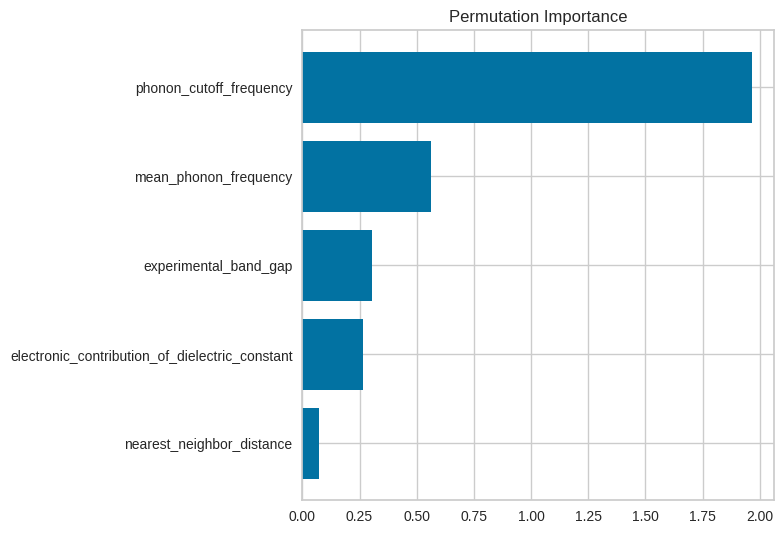

array([['nearest_neighbor_distance', 0.0744409962928491],
       ['electronic_contribution_of_dielectric_constant',
        0.26582278386634073],
       ['experimental_band_gap', 0.30570422551623316],
       ['mean_phonon_frequency', 0.5623645891886002],
       ['phonon_cutoff_frequency', 1.9637880538887917]], dtype=object)

In [119]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [120]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU)

interactive(children=(Dropdown(description='feature', options=('experimental_band_gap', 'phonon_cutoff_frequen…

# Test & Deployment

### Save the model

In [121]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate the server

In [124]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

### [Test the API](./server.ipynb)

### Docker

In [123]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)